In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px





In [3]:
df = pd.read_csv('/content/netflix_titles.csv.zip')

FileNotFoundError: [Errno 2] No such file or directory: '/content/netflix_titles.csv.zip'

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:

duplicate_rows = df.duplicated().sum()


df.drop_duplicates(inplace=True)


df.duplicated().sum()


np.int64(0)

In [ ]:
#categorical column
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')


#numeric columns
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)


df['duration'] = df['duration'].fillna(df['duration'].median())


df = df.dropna(subset=['title', 'release_year'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      8807 non-null   object 
 4   cast          8807 non-null   object 
 5   country       8807 non-null   object 
 6   date_added    8797 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8803 non-null   object 
 9   duration      8807 non-null   float64
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,0


In [ ]:
df['rating'].fillna('Unknown', inplace=True)


<ipython-input-13-93dada1772fa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Unknown', inplace=True)


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   float64       
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 825.8+ KB


In [ ]:
df['date_added'] = df['date_added'].fillna(method='ffill')

<ipython-input-16-099d0962ea58>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date_added'] = df['date_added'].fillna(method='ffill')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   float64       
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 825.8+ KB


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating  duration  \
0 2021-09-25          2020  PG-13      90.0   
1 2021-09-24          2021  TV-MA       2.0   
2 2021-09-24          2021  TV-MA       1.0   
3 2021-09-24

In [ ]:
df.describe()

,Action,Comedy,Crime,Drama,Sci-Fi
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.333333,0.333333,0.333333,0.666667,0.333333
std,0.577350,0.577350,0.577350,0.577350,0.577350
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.500000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.500000,0.500000,0.500000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'show_id': ['Dick Johnson Is Dead', 'Blood & Water', 'GangLands'],
    'listed_in': ['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries', 'Crime TV Shows, International TV Shows, TV Action & Adventure']
}
df = pd.DataFrame(data)

# Split the 'listed_in' column into a list of genres
df['listed_in'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# One-hot encode the 'listed_in' column
genre_encoded = pd.DataFrame(mlb.fit_transform(df['listed_in']),
                             columns=mlb.classes_,
                             index=df.index)

# Concatenate the original DataFrame with the one-hot encoded genres
df = pd.concat([df.drop(columns=['listed_in']), genre_encoded], axis=1)


In [ ]:
df.head()

,show_id,Crime TV Shows,Documentaries,International TV Shows,TV Action & Adventure,TV Dramas,TV Mysteries
0,Dick Johnson Is Dead,0,1,0,0,0,0
1,Blood & Water,0,0,1,0,1,1
2,GangLands,1,0,1,1,0,0


Index(['show_id', 'Crime TV Shows', 'Documentaries', 'International TV Shows',
       'TV Action & Adventure', 'TV Dramas', 'TV Mysteries'],
      dtype='object')


In [ ]:
plt.show()

In [ ]:
def parse_duration(duration):
    """
    This function takes a duration string and returns the numeric value
    and the unit (minutes or hours). Handles missing or invalid data.
    """
    # Handle missing or invalid data
    if not isinstance(duration, str):
        return None, None

    # Remove any spaces and split the duration by 'h' for hours and minutes
    parts = duration.replace(' ', '').split('h')

    # If there's no 'h', it's assumed to be in minutes
    if len(parts) == 1:
        if 'min' in parts[0]:
            numeric_value = int(parts[0].replace('min', '').strip())
            unit = 'min'
        else:
            return None, None  # Invalid format, return None
    else:
        # If 'h' is present, split into hours and minutes
        try:
            hours = int(parts[0])  # hours part
            minutes = 0
            if 'min' in parts[1]:
                minutes = int(parts[1].replace('min', ''))  # minutes part
            numeric_value = hours * 60 + minutes
            unit = 'min'
        except ValueError:
            return None, None  # Invalid format, return None

    return numeric_value, unit

# Apply the parse_duration function and create two new columns
df[['duration_numeric', 'unit']] = df['duration'].apply(lambda x: pd.Series(parse_duration(x)))

# Display the DataFrame to see the result
print(df)

KeyError: 'duration'

In [ ]:


df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year


print(df[['date_added', 'month_added', 'year_added']].head())


In [ ]:

numerical_features = df.select_dtypes(include=['number']).columns


categorical_features = df.select_dtypes(include=['object']).columns


print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")


print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Number of numerical features: 6
Number of categorical features: 1
Numerical features: Index(['Crime TV Shows', 'Documentaries', 'International TV Shows',
       'TV Action & Adventure', 'TV Dramas', 'TV Mysteries'],
      dtype='object')
Categorical features: Index(['show_id'], dtype='object')


In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration_minutes'])
plt.title('Boxplot of Duration in Minutes')
plt.xlabel('Duration (minutes)')
plt.show()


Q1 = df['duration_minutes'].quantile(0.25)
Q3 = df['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['duration_minutes'] < lower_bound) | (df['duration_minutes'] > upper_bound)]
print(f"Number of outliers in 'duration_minutes': {outliers.shape[0]}")
print(outliers[['show_id', 'title', 'duration_minutes']])


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration_minutes'])
plt.scatter(outliers['duration_minutes'], np.ones(len(outliers)), color='red', label='Outliers')
plt.title('Boxplot of Duration with Outliers Highlighted')
plt.xlabel('Duration (minutes)')
plt.legend()
plt.show()


KeyError: 'duration_minutes'

<Figure size 1000x600 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of Movies and TV Shows
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies and TV Shows on Netflix')
plt.show()


ValueError: Could not interpret value `type` for `x`. An entry with this name does not appear in `data`.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the column 'type' exists
if 'type' in df.columns:
    # Plot the count of Movies and TV Shows
    sns.countplot(data=df, x='type', palette='Set2')
    plt.title('Count of Movies and TV Shows on Netflix')
    plt.show()
else:
    print("The 'type' column is missing in the DataFrame.")


The 'type' column is missing in the DataFrame.


<ipython-input-26-d8d01e386388>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['date_added'] = pd.to_datetime(tv_shows['date_added'], errors='coerce')
<ipython-input-26-d8d01e386388>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['year_added'] = tv_shows['date_added'].dt.year


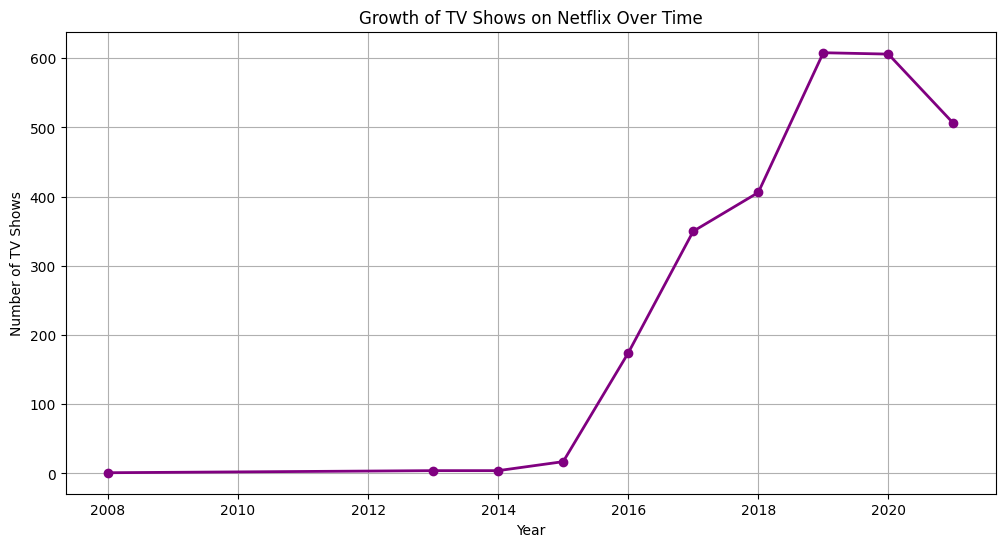

In [ ]:




# Assuming df is your DataFrame

# Filter the dataset to only include TV Shows
tv_shows = df[df['type'] == 'TV Show']

# Ensure 'date_added' is in datetime format
tv_shows['date_added'] = pd.to_datetime(tv_shows['date_added'], errors='coerce')

# Extract the year from the 'date_added' column
tv_shows['year_added'] = tv_shows['date_added'].dt.year

# Count the number of TV shows added each year
tv_shows_growth = tv_shows['year_added'].value_counts().sort_index()

# Plot the growth of TV shows over the years
plt.figure(figsize=(12, 6))
tv_shows_growth.plot(kind='line', marker='o', color='purple', linestyle='-', linewidth=2, markersize=6)
plt.title('Growth of TV Shows on Netflix Over Time')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.grid(True)
plt.show()



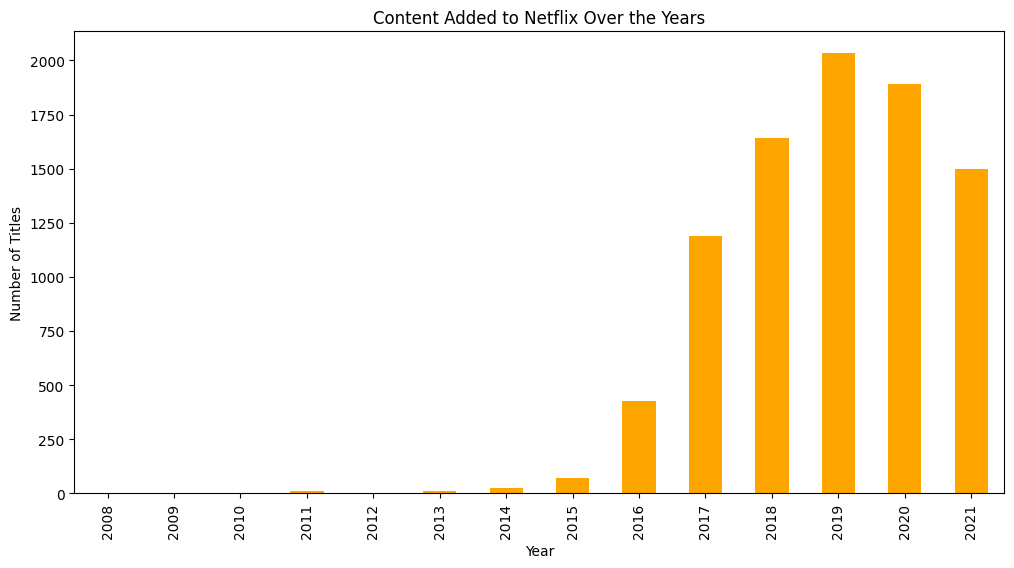

In [ ]:
# Extract the year from 'date_added' column
df['year_added'] = df['date_added'].dt.year

# Plot the number of titles added over the years
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='orange')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


<ipython-input-28-6622716692fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='cool')


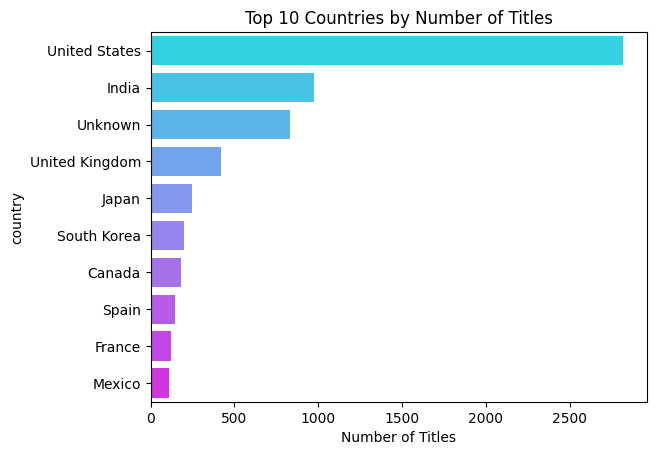

In [ ]:
# Get the top 10 countries by the number of titles
top_countries = df['country'].value_counts().head(10)

# Create the bar plot
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cool')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.show()


<ipython-input-29-50eeb1f5c105>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


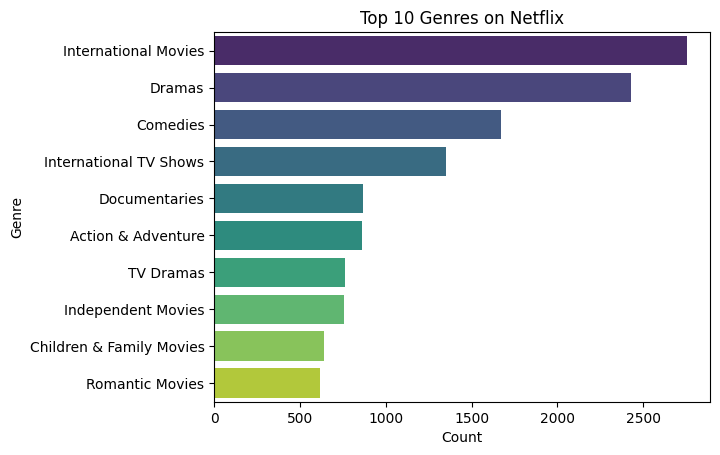

In [ ]:
from collections import Counter

# Split the genres by commas and strip spaces
genres = ','.join(df['listed_in']).split(',')
genres = [genre.strip() for genre in genres]

# Get the top 10 most common genres
top_genres = Counter(genres).most_common(10)

# Create a DataFrame for top genres
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

# Plot the top 10 genres
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.show()


<ipython-input-30-9fb9f8a464e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='magma')


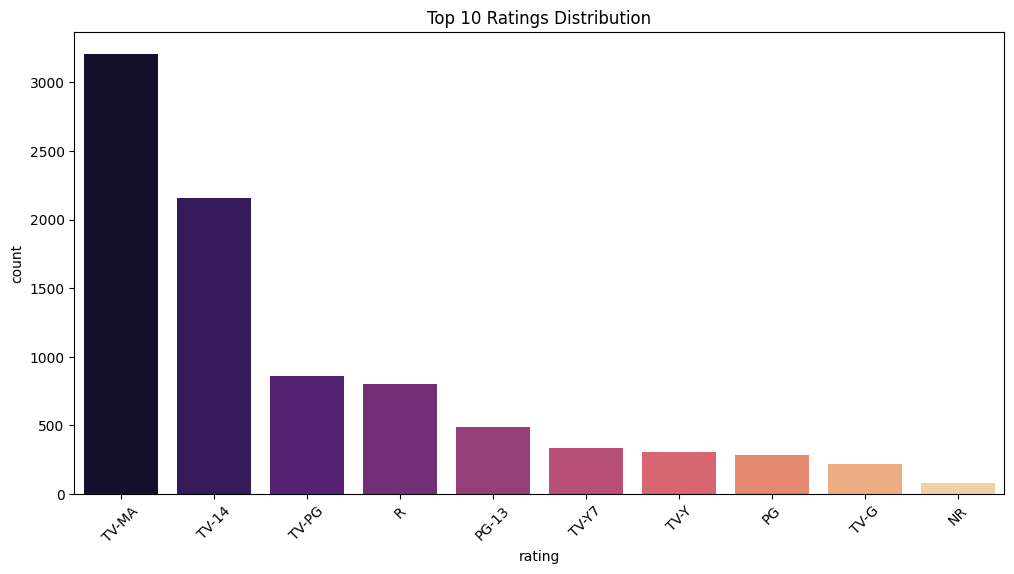

In [ ]:
# Plot the top 10 ratings distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='magma')
plt.title('Top 10 Ratings Distribution')
plt.xticks(rotation=45)
plt.show()


<ipython-input-33-66adaf393e14>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].astype(str)
<ipython-input-33-66adaf393e14>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_int'] = movies['duration'].str.extract('(\d+)')
<ipython-input-33-66adaf393e14>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

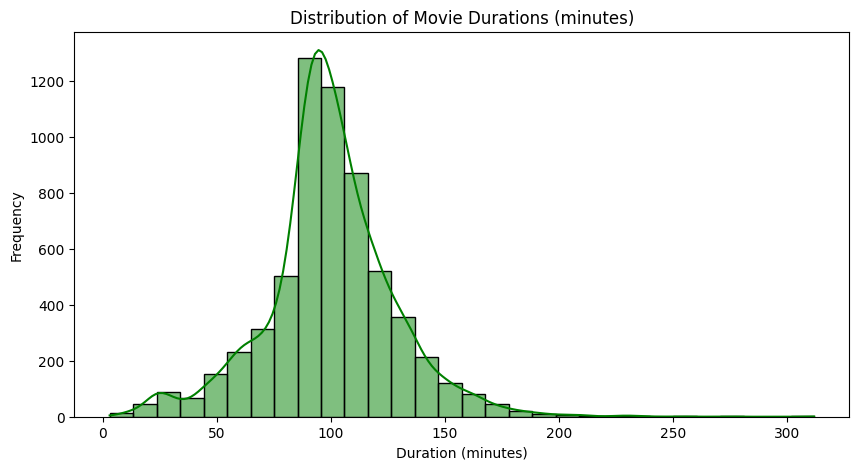

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


movies = df[df['type'] == 'Movie']


movies['duration'] = movies['duration'].astype(str)


movies['duration_int'] = movies['duration'].str.extract('(\d+)')


movies['duration_int'] = pd.to_numeric(movies['duration_int'], errors='coerce')


plt.figure(figsize=(10,5))
sns.histplot(movies['duration_int'], bins=30, kde=True, color='green')
plt.title('Distribution of Movie Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()
